#Coding Assignment 6

###*SVM*
###*Author: Sreehari Sreenath*
Ref: https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [ ]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## load file

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/pima-indians-diabetes.csv') 

##Understanding the data

In [ ]:
print(dataset.describe())
print(dataset.info())
print(dataset.shape)

         pregnant  plasma_glucose  ...         age        Diab
count  768.000000      768.000000  ...  768.000000  768.000000
mean     3.845052      120.894531  ...   33.240885    0.348958
std      3.369578       31.972618  ...   11.760232    0.476951
min      0.000000        0.000000  ...   21.000000    0.000000
25%      1.000000       99.000000  ...   24.000000    0.000000
50%      3.000000      117.000000  ...   29.000000    0.000000
75%      6.000000      140.250000  ...   41.000000    1.000000
max     17.000000      199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   plasma_glucose  768 non-null    int64  
 2   dia_BP          768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   serum_insulin   768 non-null    

### Cleaning up the data

In [ ]:
#Checking for the missing entries
All_featureset = ['pregnant','plasma_glucose','dia_BP','skin_thickness','serum_insulin','bmi','diab_pedigree','age'] 
for feature in All_featureset:
  print("Missing entries in '{}': {}".format(feature,len(dataset.loc[dataset[feature] == 0])))

#removing rows with missing entries
dataset[All_featureset] = dataset[All_featureset].replace(0, np.nan)
dataset.dropna(inplace=True)

print(dataset.shape)

Missing entries in 'pregnant': 111
Missing entries in 'plasma_glucose': 5
Missing entries in 'dia_BP': 35
Missing entries in 'skin_thickness': 227
Missing entries in 'serum_insulin': 374
Missing entries in 'bmi': 11
Missing entries in 'diab_pedigree': 0
Missing entries in 'age': 0
(336, 9)


### Getting the correlation between each feature in the dataset
[Reference link for heatmap generation](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)

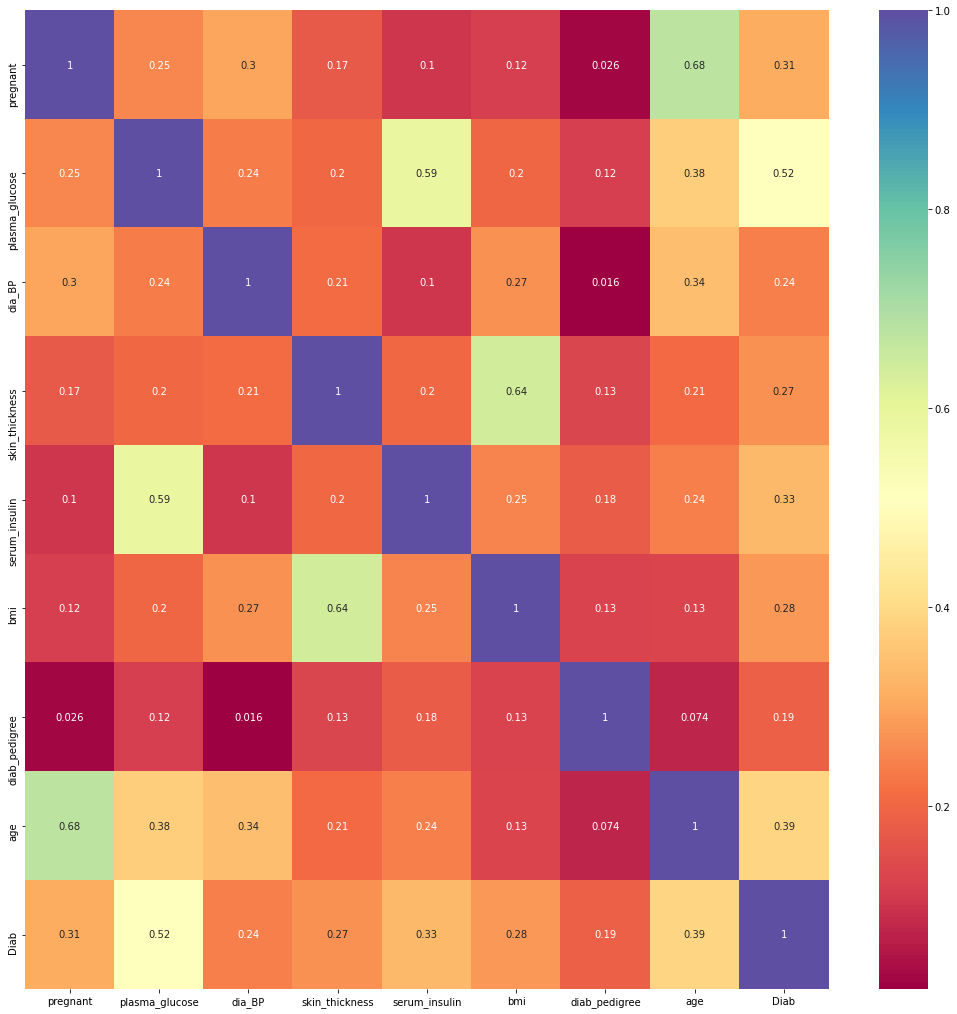

In [ ]:
correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(18,18))
#plot heat map
Heat_map = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="Spectral")



## Calculating the required Metrics

### Creating a function to print the metrics

In [ ]:
def PrintMet(kernel, test, predict):
  Confusion_matrix = confusion_matrix(test, predict)
  print('confusion_matrix for {} kernel:'.format(kernel)) 
  print(Confusion_matrix)
  
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(test, predict)
  print('Accuracy for {} kernel: {:.2f}'.format(kernel, accuracy))
  
  # precision tp / (tp + fp)
  precision = precision_score(test, predict)
  print('Precision for {} kernel: {:.2f}'.format(kernel,precision))
  
  # recall: tp / (tp + fn)
  recall = recall_score(test, predict)
  print('Recall for {} kernel: {:.2f}'.format(kernel,recall))
  
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(test, predict)
  print('F1 score for {} kernel : {:.2f}'.format(kernel,f1))

  AUROC = roc_auc_score(test, predict)
  print('AUROC for {} kernel : {:.2f}\n\n'.format(kernel,AUROC))




In [ ]:
def GenerateMet(featureset,X_train, X_test, y_train, y_test):
  
  #Creating a SVM classifier with 'linear' kernel
  Linear_clf = svm.SVC(kernel='linear') # Linear Kernel
  #Train the model using the training sets
  Linear_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_Linear = Linear_clf.predict(X_test)

  #Creating a SVM classifier with radial basis function kernel
  Rbf_clf = svm.SVC(kernel='rbf') # rbf Kernel
  #Train the model using the training sets
  Rbf_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_rbf = Rbf_clf.predict(X_test)

  #Creating a SVM classifier with Polynomial kernel
  Poly_clf = svm.SVC(kernel='poly') # poly Kernel
  #Train the model using the training sets
  Poly_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_poly = Poly_clf.predict(X_test)

  #Printing the metrics
  print(featureset)
  PrintMet("Linear", y_test, y_predict_Linear)
  PrintMet("Rbf", y_test, y_predict_rbf)
  PrintMet("Polynomial", y_test, y_predict_poly)

  
  

### All Feature Set

In [ ]:
class_label = ['Diab']
X = dataset[All_featureset].values
y = dataset[class_label].values
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
GenerateMet('ALL feature Set',X_train, X_test, y_train, y_test)


ALL feature Set
confusion_matrix for Linear kernel:
[[37  3]
 [17 11]]
Accuracy for Linear kernel: 0.71
Precision for Linear kernel: 0.79
Recall for Linear kernel: 0.39
F1 score for Linear kernel : 0.52
AUROC for Linear kernel : 0.66


confusion_matrix for Rbf kernel:
[[34  6]
 [16 12]]
Accuracy for Rbf kernel: 0.68
Precision for Rbf kernel: 0.67
Recall for Rbf kernel: 0.43
F1 score for Rbf kernel : 0.52
AUROC for Rbf kernel : 0.64


confusion_matrix for Polynomial kernel:
[[37  3]
 [15 13]]
Accuracy for Polynomial kernel: 0.74
Precision for Polynomial kernel: 0.81
Recall for Polynomial kernel: 0.46
F1 score for Polynomial kernel : 0.59
AUROC for Polynomial kernel : 0.69




### CASE A

In [ ]:
case_A = ['pregnant','bmi','age'] 
class_label = ['Diab']
X = dataset[case_A].values
y = dataset[class_label].values
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
GenerateMet('CASE A',X_train, X_test, y_train, y_test)

CASE A
confusion_matrix for Linear kernel:
[[38  2]
 [17 11]]
Accuracy for Linear kernel: 0.72
Precision for Linear kernel: 0.85
Recall for Linear kernel: 0.39
F1 score for Linear kernel : 0.54
AUROC for Linear kernel : 0.67


confusion_matrix for Rbf kernel:
[[39  1]
 [19  9]]
Accuracy for Rbf kernel: 0.71
Precision for Rbf kernel: 0.90
Recall for Rbf kernel: 0.32
F1 score for Rbf kernel : 0.47
AUROC for Rbf kernel : 0.65


confusion_matrix for Polynomial kernel:
[[40  0]
 [19  9]]
Accuracy for Polynomial kernel: 0.72
Precision for Polynomial kernel: 1.00
Recall for Polynomial kernel: 0.32
F1 score for Polynomial kernel : 0.49
AUROC for Polynomial kernel : 0.66




### CASE B

In [ ]:
case_B = ['dia_BP','skin_thickness','diab_pedigree'] 
class_label = ['Diab']
X = dataset[case_A].values
y = dataset[class_label].values
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
GenerateMet('CASE B',X_train, X_test, y_train, y_test)

CASE B
confusion_matrix for Linear kernel:
[[38  2]
 [17 11]]
Accuracy for Linear kernel: 0.72
Precision for Linear kernel: 0.85
Recall for Linear kernel: 0.39
F1 score for Linear kernel : 0.54
AUROC for Linear kernel : 0.67


confusion_matrix for Rbf kernel:
[[39  1]
 [19  9]]
Accuracy for Rbf kernel: 0.71
Precision for Rbf kernel: 0.90
Recall for Rbf kernel: 0.32
F1 score for Rbf kernel : 0.47
AUROC for Rbf kernel : 0.65


confusion_matrix for Polynomial kernel:
[[40  0]
 [19  9]]
Accuracy for Polynomial kernel: 0.72
Precision for Polynomial kernel: 1.00
Recall for Polynomial kernel: 0.32
F1 score for Polynomial kernel : 0.49
AUROC for Polynomial kernel : 0.66


